In [1]:
# 라이브러리 임포트
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch import autograd
from torch.utils import data
from torch.optim import Adam

In [2]:
# 난수 생성기가 항상 일정한 값을 출력하게 하기 위해 seed 고정
random_seed = 2021
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
np.random.seed(random_seed)

## Data Preprocessing

In [3]:
DATASET_PATH = os.path.join('./data')

In [4]:
train_df = pd.read_csv(os.path.join(DATASET_PATH, 'train.csv'))

In [5]:
train_df.describe()

,날짜,시간,10,100,101,120,121,140,150,160,...,1020,1040,1100,1200,1510,2510,3000,4510,5510,6000
count,3.279000e+03,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,...,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000
mean,2.020030e+07,11.471485,231676.505337,66678.847514,7143.639829,17331.323879,6628.811833,4680.581580,99293.113144,4392.170784,...,5146.086612,10912.152181,27170.792925,13920.547728,4869.270204,14628.283623,2461.659652,12099.310765,7945.500762,13955.133882
std,1.329223e+02,6.925364,121980.705751,41643.311713,5571.818718,13324.699817,4783.716536,3532.599568,58442.772440,2855.469702,...,3874.383388,6166.799088,15608.559732,7125.224311,4082.563691,9570.485274,1876.079260,7996.564920,5208.472823,9277.435792
min,2.020010e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.020020e+07,5.000000,111763.500000,23461.500000,1898.500000,5187.500000,1697.500000,1311.000000,42964.000000,1524.500000,...,1304.500000,4479.000000,11522.500000,7208.500000,1492.000000,4975.500000,713.500000,3607.500000,2534.000000,3952.000000
50%,2.020031e+07,11.000000,266717.000000,73756.000000,6924.000000,16623.000000,7004.000000,4675.000000,111362.000000,4741.000000,...,5134.000000,12865.000000,31100.000000,15916.000000,4228.000000,15863.000000,2199.000000,13438.000000,8545.000000,15139.000000
75%,2.020041e+07,17.000000,327157.000000,99830.500000,10882.500000,25910.500000,10314.000000,6924.500000,140880.000000,6661.000000,...,8128.000000,16198.000000,39064.500000,19433.000000,6756.000000,21724.000000,3749.500000,18715.500000,12490.500000,22057.500000
max,2.020052e+07,23.000000,580098.000000,200808.000000,45869.000000,114833.000000,24596.000000,24639.000000,292004.000000,14163.000000,...,21409.000000,25891.000000,76629.000000,35192.000000,28531.000000,45531.000000,10581.000000,38061.000000,21229.000000,36915.000000


In [6]:
train_df[train_df.iloc[:,2:].sum(axis=1) < 90000]
# 특이값 : 882, 3212

,날짜,시간,10,100,101,120,121,140,150,160,...,1020,1040,1100,1200,1510,2510,3000,4510,5510,6000
882,20200206,18,0,86,0,1,0,0,4,0,...,49,0,0,4,0,0,0,35,0,0
1275,20200223,3,21487,4673,563,988,389,197,8328,222,...,285,1005,2913,2187,529,788,79,779,525,924
1432,20200301,3,18776,4372,504,1097,370,253,8645,251,...,257,934,2529,2024,363,947,45,669,523,701
1600,20200308,3,18729,4043,497,937,341,332,8646,252,...,219,852,2327,2044,465,771,61,581,528,816
1768,20200315,3,20690,4528,320,1218,397,228,8575,278,...,236,940,2505,2069,432,701,92,745,487,847
2126,20200330,1,20378,3927,313,1060,315,223,7095,287,...,149,746,1220,1040,348,980,83,602,358,685
3212,20200515,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# 특이값 처리
train_df.iloc[3212][2:] = ((train_df.iloc[3211][2:] + train_df.iloc[3213][2:])/2).astype("int64")
train_df.iloc[882][2:] = ((train_df.iloc[881][2:] + train_df.iloc[883][2:])/2).astype("int64")

In [8]:
train_df.describe()

,날짜,시간,10,100,101,120,121,140,150,160,...,1020,1040,1100,1200,1510,2510,3000,4510,5510,6000
count,3.279000e+03,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,...,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000
mean,2.020030e+07,11.471485,231810.527905,66716.426654,7146.839585,17339.755108,6631.919183,4682.777676,99343.686185,4394.603538,...,5148.919793,10918.731321,27189.692894,13930.538274,4871.107350,14635.982312,2463.243062,12107.631900,7950.594998,13963.283928
std,1.329223e+02,6.925364,121866.197173,41615.922741,5569.675580,13319.298462,4781.657228,3531.160685,58398.256328,2853.829831,...,3872.859247,6161.308192,15597.076350,7118.453812,4081.221091,9565.114141,1875.650234,7992.542248,5205.489212,9272.138634
min,2.020010e+07,0.000000,18729.000000,3927.000000,313.000000,937.000000,229.000000,197.000000,7095.000000,222.000000,...,149.000000,746.000000,1220.000000,1040.000000,246.000000,701.000000,45.000000,581.000000,358.000000,685.000000
25%,2.020020e+07,5.000000,111869.000000,23515.000000,1906.000000,5204.500000,1702.000000,1316.500000,43142.500000,1530.000000,...,1310.000000,4502.000000,11575.000000,7268.500000,1496.500000,4986.000000,714.500000,3614.000000,2550.500000,3969.500000
50%,2.020031e+07,11.000000,267062.000000,73873.000000,6930.000000,16630.000000,7008.000000,4685.000000,111503.000000,4751.000000,...,5138.000000,12868.000000,31117.000000,15917.000000,4236.000000,15915.000000,2201.000000,13458.000000,8547.000000,15144.000000
75%,2.020041e+07,17.000000,327157.000000,99830.500000,10882.500000,25910.500000,10314.000000,6924.500000,140880.000000,6661.000000,...,8128.000000,16198.000000,39068.500000,19437.500000,6756.000000,21724.000000,3750.500000,18718.000000,12490.500000,22057.500000
max,2.020052e+07,23.000000,580098.000000,200808.000000,45869.000000,114833.000000,24596.000000,24639.000000,292004.000000,14163.000000,...,21409.000000,25891.000000,76629.000000,35192.000000,28531.000000,45531.000000,10581.000000,38061.000000,21229.000000,36915.000000


In [9]:
a = train_df.groupby("날짜").sum()["시간"] != 276
a[a]

날짜
20200229    True
20200330    True
Name: 시간, dtype: bool

In [10]:
train_df[train_df["날짜"] == 20200229]

,날짜,시간,10,100,101,120,121,140,150,160,...,1020,1040,1100,1200,1510,2510,3000,4510,5510,6000
1416,20200229,0,70783,12481,1074,2920,1020,956,26231,677,...,613,2540,7873,5389,1026,3447,401,1706,1381,1872
1417,20200229,1,51754,8195,694,2141,617,703,19200,593,...,440,1545,5193,3925,866,2685,231,1240,1014,1428
1418,20200229,2,41031,7143,641,1936,597,595,14281,416,...,372,1499,4047,2893,800,2313,237,1107,848,1307
1419,20200229,3,37688,7626,624,1742,420,500,13834,442,...,343,1424,3915,2283,636,2083,201,1257,807,1181
1420,20200229,4,46899,11199,781,2720,651,653,18429,609,...,442,2146,5882,2999,705,2737,391,1888,1163,1797
1421,20200229,5,80770,20795,1717,4251,1385,1018,38419,1110,...,944,4123,13280,7195,912,3920,542,3485,2561,4000
1422,20200229,6,126497,35718,3163,6909,3872,1840,57764,1882,...,2492,7496,19922,10239,1737,5548,895,7021,4730,8105
1423,20200229,7,156874,51431,4414,10409,5324,3191,72190,2940,...,4516,10094,22121,11850,2424,7812,1407,10988,6980,11540
1424,20200229,8,189865,57387,5271,12740,5784,3666,100060,3474,...,4062,10906,26327,15156,3405,10854,1697,11589,7241,12127
1425,20200229,9,229212,70651,7700,15575,7699,4894,110886,4191,...,4950,12192,30064,16810,4651,13805,1932,11631,8396,14127


In [11]:
train_df[train_df["날짜"] == 20200330]
# 데이터 모자란 날짜 -> 2/29 ,3/30

,날짜,시간,10,100,101,120,121,140,150,160,...,1020,1040,1100,1200,1510,2510,3000,4510,5510,6000
2125,20200330,0,38243,7403,585,1695,426,351,13476,430,...,330,1257,2574,2011,521,1662,139,950,761,1130
2126,20200330,1,20378,3927,313,1060,315,223,7095,287,...,149,746,1220,1040,348,980,83,602,358,685


In [12]:
# 3/30일 전후로 데이터 나누기
train_df_a = train_df.iloc[:2125]
train_df_b = train_df.iloc[2127:]
train_df_c = train_df[train_df["날짜"] == 20200330]

# 3/30 복구
new_df = ((train_df[train_df["날짜"]==20200329].reset_index(drop=True) + train_df[train_df["날짜"]==20200331].reset_index(drop=True))/2).astype("int64")
new_df["날짜"] = 20200330
new_df.iloc[:2] = train_df_c
train_df = pd.concat([train_df_a, new_df, train_df_b]).reset_index(drop=True)

In [13]:
# 2/29일 전후로 데이터 나누기
train_df_a = train_df.iloc[:1416]
train_df_b = train_df.iloc[1429:]
train_df_c = train_df[train_df["날짜"] == 20200229]

# 2/29 복구
new_df = ((train_df[train_df["날짜"]==20200228].reset_index(drop=True) + train_df[train_df["날짜"]==20200301].reset_index(drop=True))/2).astype("int64")
new_df["날짜"] = 20200229
new_df.iloc[:13] = train_df_c
train_df = pd.concat([train_df_a, new_df, train_df_b]).reset_index(drop=True)

train_df

,날짜,시간,10,100,101,120,121,140,150,160,...,1020,1040,1100,1200,1510,2510,3000,4510,5510,6000
0,20200101,0,83247,19128,2611,5161,1588,892,32263,1636,...,1311,3482,11299,7072,1176,3810,748,3920,2133,3799
1,20200101,1,89309,19027,3337,5502,1650,1043,35609,1644,...,1162,3849,13180,8771,1283,3763,782,3483,2057,4010
2,20200101,2,66611,14710,2970,4631,1044,921,26821,1104,...,768,2299,7986,5426,1536,3229,491,2634,1526,3388
3,20200101,3,53290,13753,2270,4242,1021,790,21322,909,...,632,1716,5703,3156,1104,2882,431,2488,1268,3686
4,20200101,4,52095,17615,2406,3689,1840,922,22711,1354,...,875,2421,5816,2933,1206,2433,499,2952,1927,5608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,20200517,19,311727,101285,10085,30637,10060,8749,148935,6801,...,6726,15431,25597,14292,9300,22238,3786,16936,10729,20194
3308,20200517,20,305354,91426,8607,26021,8095,7198,136503,6147,...,5501,15378,24661,14747,8239,20604,3203,15018,9767,17962
3309,20200517,21,306008,75113,6325,19933,5711,4494,129412,5134,...,4216,12558,22781,14081,6392,17937,2447,12403,7825,14031
3310,20200517,22,237447,49498,4209,12145,3891,2718,96698,3526,...,2578,8870,16640,11066,4427,11955,1495,7507,5387,8889


In [14]:
train_df["날짜"] = train_df["날짜"]*100 + train_df["시간"]
train_df = train_df.drop("시간", axis=1)

In [15]:
train_df["날짜"] = train_df["날짜"].apply(lambda x: pd.Timestamp(int(str(x)[:4]), int(str(x)[4:6]), int(str(x)[6:8]), int(str(x)[8:]), 0, 0))
train_df = train_df.set_index("날짜")

In [16]:
train_df

,10,100,101,120,121,140,150,160,200,201,...,1020,1040,1100,1200,1510,2510,3000,4510,5510,6000
날짜,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,83247,19128,2611,5161,1588,892,32263,1636,7938,1894,...,1311,3482,11299,7072,1176,3810,748,3920,2133,3799
2020-01-01 01:00:00,89309,19027,3337,5502,1650,1043,35609,1644,9896,1967,...,1162,3849,13180,8771,1283,3763,782,3483,2057,4010
2020-01-01 02:00:00,66611,14710,2970,4631,1044,921,26821,1104,9343,1838,...,768,2299,7986,5426,1536,3229,491,2634,1526,3388
2020-01-01 03:00:00,53290,13753,2270,4242,1021,790,21322,909,10009,1630,...,632,1716,5703,3156,1104,2882,431,2488,1268,3686
2020-01-01 04:00:00,52095,17615,2406,3689,1840,922,22711,1354,15497,1264,...,875,2421,5816,2933,1206,2433,499,2952,1927,5608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-17 19:00:00,311727,101285,10085,30637,10060,8749,148935,6801,26101,9370,...,6726,15431,25597,14292,9300,22238,3786,16936,10729,20194
2020-05-17 20:00:00,305354,91426,8607,26021,8095,7198,136503,6147,20759,8432,...,5501,15378,24661,14747,8239,20604,3203,15018,9767,17962
2020-05-17 21:00:00,306008,75113,6325,19933,5711,4494,129412,5134,14496,6739,...,4216,12558,22781,14081,6392,17937,2447,12403,7825,14031


In [17]:
val_df = pd.read_csv(os.path.join(DATASET_PATH, 'validate.csv'))
val_df.describe()

,날짜,시간,10,100,101,120,121,140,150,160,...,1020,1040,1100,1200,1510,2510,3000,4510,5510,6000
count,3.360000e+02,336.00000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,...,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000
mean,2.020052e+07,11.50000,235343.178571,71733.666667,7487.821429,19463.369048,6996.550595,5077.711310,102803.354167,4611.598214,...,5495.931548,12047.080357,25495.544643,14492.982143,5274.627976,16028.535714,2401.651786,13426.627976,8977.973214,14981.702381
std,4.037141e+00,6.93251,117811.294711,43156.834589,5324.147176,13039.262009,4900.174019,3595.835251,56432.536386,2866.635243,...,3952.463967,6583.668086,13846.890911,7081.452424,3706.415352,9929.888516,1671.879588,8268.859967,5603.276265,9589.916393
min,2.020051e+07,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.020051e+07,5.75000,124277.500000,26059.500000,2058.000000,6277.750000,1806.750000,1426.500000,49778.250000,1854.250000,...,1485.750000,5046.500000,11302.000000,8489.500000,1860.750000,5879.250000,795.000000,4374.000000,3198.000000,4672.500000
50%,2.020052e+07,11.50000,291569.500000,84219.500000,7585.500000,20308.000000,7565.000000,5329.000000,119572.000000,5062.000000,...,5640.000000,14996.500000,29671.000000,17037.500000,4891.000000,17802.500000,2363.500000,15901.500000,9662.500000,16447.000000
75%,2.020052e+07,17.25000,326878.250000,104994.750000,11626.250000,28508.250000,10776.750000,7523.750000,144746.250000,6806.250000,...,8689.750000,17698.500000,37066.500000,19961.750000,7417.000000,23388.750000,3497.500000,20104.250000,13849.250000,23266.250000
max,2.020052e+07,23.00000,439173.000000,150733.000000,19038.000000,53098.000000,17634.000000,14861.000000,226740.000000,10638.000000,...,15828.000000,21257.000000,48132.000000,26537.000000,15578.000000,36225.000000,6220.000000,29441.000000,19906.000000,31504.000000


In [18]:
val_df[val_df.iloc[:,2:].sum(axis=1) < 90000]

,날짜,시간,10,100,101,120,121,140,150,160,...,1020,1040,1100,1200,1510,2510,3000,4510,5510,6000
101,20200515,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
val_df.iloc[101][2:] = ((val_df.iloc[100][2:] + val_df.iloc[102][2:])/2).astype("int64")
# 특이값 처리

In [20]:
val_df.describe()

,날짜,시간,10,100,101,120,121,140,150,160,...,1020,1040,1100,1200,1510,2510,3000,4510,5510,6000
count,3.360000e+02,336.00000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,...,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000
mean,2.020052e+07,11.50000,235734.360119,71839.559524,7494.854167,19482.988095,7002.627976,5082.407738,102952.785714,4617.672619,...,5502.145833,12070.669643,25552.937500,14525.497024,5279.077381,16046.904762,2403.883929,13448.880952,8992.485119,15004.255952
std,4.037141e+00,6.93251,117244.374916,43023.743724,5315.780973,13014.826055,4892.731360,3590.209678,56225.600300,2858.986325,...,3945.432342,6554.509402,13780.707223,7039.666538,3700.957795,9905.828791,1669.162005,8242.638049,5586.243114,9563.451696
min,2.020051e+07,0.00000,25263.000000,7113.000000,0.000000,1761.000000,0.000000,0.000000,11640.000000,428.000000,...,322.000000,1313.000000,2574.000000,1931.000000,549.000000,1265.000000,94.000000,1136.000000,819.000000,1250.000000
25%,2.020051e+07,5.75000,125006.250000,26646.250000,2085.250000,6383.250000,1859.750000,1436.250000,50215.750000,1856.750000,...,1497.000000,5316.000000,11519.500000,8720.250000,1860.750000,5954.250000,795.000000,4511.500000,3311.250000,4696.000000
50%,2.020052e+07,11.50000,291569.500000,84219.500000,7585.500000,20308.000000,7565.000000,5329.000000,119572.000000,5062.000000,...,5640.000000,14996.500000,29671.000000,17037.500000,4891.000000,17802.500000,2363.500000,15901.500000,9662.500000,16447.000000
75%,2.020052e+07,17.25000,326878.250000,104994.750000,11626.250000,28508.250000,10776.750000,7523.750000,144746.250000,6806.250000,...,8689.750000,17698.500000,37066.500000,19961.750000,7417.000000,23388.750000,3497.500000,20104.250000,13849.250000,23266.250000
max,2.020052e+07,23.00000,439173.000000,150733.000000,19038.000000,53098.000000,17634.000000,14861.000000,226740.000000,10638.000000,...,15828.000000,21257.000000,48132.000000,26537.000000,15578.000000,36225.000000,6220.000000,29441.000000,19906.000000,31504.000000


In [21]:
val_df[val_df["101"] == 0]

,날짜,시간,10,100,101,120,121,140,150,160,...,1020,1040,1100,1200,1510,2510,3000,4510,5510,6000
251,20200521,11,339887,99234,0,19127,0,0,140396,6696,...,7853,17197,29479,18025,7938,22988,2045,20082,13671,22567
252,20200521,12,322724,94243,0,16294,0,0,138321,6241,...,6034,16643,27321,17244,7317,20898,2125,16320,11651,19487
253,20200521,13,329873,93115,0,16674,0,0,137759,6276,...,6709,17356,29011,18653,7241,21368,2206,18046,12433,19496


In [22]:
val_df.iloc[245:260]
# 5/21 10시 ~ 14시 사이 101, 121, 140 도로 이상값

,날짜,시간,10,100,101,120,121,140,150,160,...,1020,1040,1100,1200,1510,2510,3000,4510,5510,6000
245,20200521,5,146568,39000,3000,9046,2501,2075,68447,2003,...,1704,7126,22458,13381,1863,7241,821,7286,4632,7648
246,20200521,6,250393,68172,6333,14792,6434,3865,107222,3817,...,4610,15118,38804,21534,2826,11868,1768,15909,9275,14852
247,20200521,7,316943,101312,9636,21268,11327,6395,122742,5884,...,9091,17968,44664,26146,4057,20684,3290,25962,15077,23674
248,20200521,8,331717,102266,11024,25398,12741,7843,130101,6913,...,8824,18153,40523,24075,4691,24881,3853,25126,14953,24156
249,20200521,9,321981,101842,10269,27726,11048,6978,155996,6323,...,7560,17388,35914,19875,5927,23000,2433,20816,13748,22349
250,20200521,10,343667,107261,2942,21563,2881,1831,140808,7163,...,9071,17838,33240,18792,7137,23833,2246,21369,14187,23894
251,20200521,11,339887,99234,0,19127,0,0,140396,6696,...,7853,17197,29479,18025,7938,22988,2045,20082,13671,22567
252,20200521,12,322724,94243,0,16294,0,0,138321,6241,...,6034,16643,27321,17244,7317,20898,2125,16320,11651,19487
253,20200521,13,329873,93115,0,16674,0,0,137759,6276,...,6709,17356,29011,18653,7241,21368,2206,18046,12433,19496
254,20200521,14,334335,101138,7225,24275,6751,4802,149134,6716,...,7698,17587,33825,19185,7900,21934,2359,18697,13151,21906


In [23]:
val_df.iloc[250:255,[4,6,7]] = ((val_df.iloc[250-24:255-24,[4,6,7]].values + val_df.iloc[250+24:255+24,[4,6,7]].values)/2).astype("int64")

In [24]:
val_df["날짜"] = val_df["날짜"]*100 + val_df["시간"]
val_df = val_df.drop("시간", axis=1)

In [25]:
val_df["날짜"] = val_df["날짜"].apply(lambda x: pd.Timestamp(int(str(x)[:4]), int(str(x)[4:6]), int(str(x)[6:8]), int(str(x)[8:]), 0, 0))
val_df = val_df.set_index("날짜")

In [26]:
val_df

,10,100,101,120,121,140,150,160,200,201,...,1020,1040,1100,1200,1510,2510,3000,4510,5510,6000
날짜,,,,,,,,,,,,,,,,,,,,,
2020-05-11 00:00:00,77968,14429,1233,4021,981,881,28672,1064,2859,1549,...,637,2604,5239,4168,1155,3596,337,2262,1608,2337
2020-05-11 01:00:00,48679,9136,823,2618,654,572,17722,672,1940,1133,...,353,1870,3359,2558,1002,2157,257,1425,1018,1810
2020-05-11 02:00:00,33773,8199,578,2188,392,502,14464,579,1425,1211,...,345,1499,2646,2022,876,1959,232,1155,927,1530
2020-05-11 03:00:00,41511,9986,726,2817,555,646,17793,650,1678,1748,...,390,1730,3398,1967,912,2462,281,1477,959,1882
2020-05-11 04:00:00,78680,19509,1463,4720,825,1088,35125,997,2531,2304,...,679,2958,7369,4120,1569,4568,577,3155,1871,3656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-24 19:00:00,314226,98345,10625,28618,8316,6684,141675,6619,23535,8572,...,8254,16118,23304,14082,8447,21694,2180,15746,10903,21014
2020-05-24 20:00:00,300001,87871,8226,22706,6981,5743,142933,6295,20953,7851,...,5225,15297,21919,14526,7332,19732,1990,14096,10028,17787
2020-05-24 21:00:00,304150,71126,6002,18317,4939,3779,133110,4781,15242,6101,...,4072,12685,21135,14403,5443,16967,1359,11670,7963,14041


In [27]:
test_df = pd.read_csv(os.path.join(DATASET_PATH, 'test.csv'))
# test_df.iloc[82:87]

In [28]:
test_df.iloc[82:87,[4,6,7]] = ((test_df.iloc[82-24:87-24,[4,6,7]].values + test_df.iloc[82+24:87+24,[4,6,7]].values)/2).astype("int64")
test_df

,날짜,시간,10,100,101,120,121,140,150,160,...,1020,1040,1100,1200,1510,2510,3000,4510,5510,6000
0,20200518,0,82065,15172,1500,3294,1086,962,28931,1103,...,618,2790,5147,4331,1329,3665,404,2242,1619,2314
1,20200518,1,51248,9840,813,2356,696,546,17888,720,...,430,1864,3269,2561,921,2081,272,1390,1003,1766
2,20200518,2,39026,7894,760,2413,408,549,13357,498,...,322,1313,2765,1931,920,1764,228,1136,922,1309
3,20200518,3,40993,10137,780,2701,420,741,15544,532,...,326,1766,3320,2060,892,2447,337,1495,975,1912
4,20200518,4,77863,19603,1276,5019,968,1160,32101,968,...,669,2914,6986,3911,1368,4380,513,2940,1758,3629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,20200531,19,-999,-999,-999,-999,-999,-999,-999,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
332,20200531,20,-999,-999,-999,-999,-999,-999,-999,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
333,20200531,21,-999,-999,-999,-999,-999,-999,-999,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
334,20200531,22,-999,-999,-999,-999,-999,-999,-999,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999


In [29]:
test_df["날짜"] = test_df["날짜"]*100 + test_df["시간"]
test_df = test_df.drop("시간", axis=1)

In [30]:
test_df["날짜"] = test_df["날짜"].apply(lambda x: pd.Timestamp(int(str(x)[:4]), int(str(x)[4:6]), int(str(x)[6:8]), int(str(x)[8:]), 0, 0))
test_df = test_df.set_index("날짜")

In [31]:
# test_df.describe()
test_df.iloc[:24*7]

,10,100,101,120,121,140,150,160,200,201,...,1020,1040,1100,1200,1510,2510,3000,4510,5510,6000
날짜,,,,,,,,,,,,,,,,,,,,,
2020-05-18 00:00:00,82065,15172,1500,3294,1086,962,28931,1103,3014,1619,...,618,2790,5147,4331,1329,3665,404,2242,1619,2314
2020-05-18 01:00:00,51248,9840,813,2356,696,546,17888,720,1839,1502,...,430,1864,3269,2561,921,2081,272,1390,1003,1766
2020-05-18 02:00:00,39026,7894,760,2413,408,549,13357,498,1360,1233,...,322,1313,2765,1931,920,1764,228,1136,922,1309
2020-05-18 03:00:00,40993,10137,780,2701,420,741,15544,532,1671,1800,...,326,1766,3320,2060,892,2447,337,1495,975,1912
2020-05-18 04:00:00,77863,19603,1276,5019,968,1160,32101,968,2574,2384,...,669,2914,6986,3911,1368,4380,513,2940,1758,3629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-24 19:00:00,314226,98345,10625,28618,8316,6684,141675,6619,23535,8572,...,8254,16118,23304,14082,8447,21694,2180,15746,10903,21014
2020-05-24 20:00:00,300001,87871,8226,22706,6981,5743,142933,6295,20953,7851,...,5225,15297,21919,14526,7332,19732,1990,14096,10028,17787
2020-05-24 21:00:00,304150,71126,6002,18317,4939,3779,133110,4781,15242,6101,...,4072,12685,21135,14403,5443,16967,1359,11670,7963,14041


In [32]:
test_df[:24*7].describe()

,10,100,101,120,121,140,150,160,200,201,...,1020,1040,1100,1200,1510,2510,3000,4510,5510,6000
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,...,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,238748.250000,73083.892857,7794.041667,19617.803571,7237.761905,5210.869048,104727.291667,4670.982143,12787.994048,6506.053571,...,5604.761905,12191.916667,24968.803571,14767.636905,5405.226190,16078.047619,2204.369048,13579.363095,9153.250000,15214.184524
std,119060.280011,44178.602676,5458.545278,13223.802840,4959.408191,3593.694252,57587.061337,2920.100904,9020.160254,3921.538743,...,4101.901741,6614.650282,13512.647628,7077.389254,3898.381437,10002.979606,1523.386283,8346.246743,5740.852704,9758.697882
min,25263.000000,7113.000000,546.000000,1965.000000,408.000000,382.000000,11640.000000,438.000000,1309.000000,567.000000,...,322.000000,1313.000000,2574.000000,1931.000000,549.000000,1265.000000,94.000000,1136.000000,819.000000,1250.000000
25%,125721.000000,28810.000000,2326.750000,6696.000000,2276.250000,1546.000000,50402.250000,1891.000000,4322.750000,2547.250000,...,1534.500000,5600.000000,11184.250000,9089.500000,1893.000000,5879.250000,729.250000,4685.000000,3382.500000,4993.000000
50%,296855.500000,86358.000000,8216.000000,19551.000000,8107.500000,5692.000000,121864.000000,5052.500000,12863.500000,6659.000000,...,5855.500000,15207.500000,28861.000000,17278.500000,4920.500000,18163.500000,2184.500000,15985.000000,9843.000000,17116.000000
75%,332371.500000,106548.750000,11785.000000,28592.500000,11039.750000,7566.250000,144725.250000,6868.250000,17750.500000,9574.000000,...,8606.250000,17778.250000,36222.750000,20060.750000,7372.000000,23148.250000,3333.750000,20544.500000,14017.250000,23572.000000
max,439173.000000,150733.000000,19038.000000,50026.000000,17634.000000,14861.000000,226740.000000,10638.000000,33129.000000,14435.000000,...,15828.000000,21257.000000,48132.000000,26146.000000,15578.000000,35618.000000,5946.000000,29441.000000,19906.000000,31504.000000


## Darts

In [38]:
from darts import TimeSeries
from darts.models import (
    RNNModel,
    TCNModel,
    TransformerModel,
    NBEATSModel,
    BlockRNNModel,
)

In [39]:
# Dataframe to TimeSeries
train_df = TimeSeries.from_dataframe(train_df)
val_df = TimeSeries.from_dataframe(val_df)
test_df = TimeSeries.from_dataframe(test_df)

### DeepAR

In [40]:
# DeepAR
# my_model = RNNModel(
#     model="LSTM",
#     hidden_dim=100,
#     n_rnn_layers=2,
#     dropout=0.3,
#     batch_size=16,
#     n_epochs=50,
#     optimizer_kwargs={"lr": 1e-4},
#     random_state=42,
#     training_length=24*7,
#     input_chunk_length=24*7,
#     likelihood=GaussianLikelihood(),
# )

In [31]:
# pred_series = model.predict(n=24*7, series=val_df[:24*7])

# val_df[24*7:].plot(label="actual")
# pred_series.plot(label="forecast")
# plt.legend()

### Nbeats

In [32]:
# 1. epoch 100 : loss 3.x+e07
# 2. epoch 512 : loss 9.x+e06
# 3. epoch 1024, train(3월~) : loss 7.76+e06

model = NBEATSModel(input_chunk_length=24*7, 
                    output_chunk_length=24*7, 
                    # generic_architecture=False,
                    n_epochs = 1024 , 
                    random_state = 15,
                    batch_size=64,
                    torch_device_str="cuda",)

In [49]:
# 4. epoch 2048, loss= 3.07+e06 -> best
# 5. epoch 2048, input: 7->14, loss= 2.35+e06

model = NBEATSModel(input_chunk_length=24*7, 
                    output_chunk_length=24*7,
                    # generic_architecture=False,
                    num_blocks=3,
                    num_layers=4,
                    layer_widths=128,
                    optimizer_kwargs={"lr": 1e-3},
                    n_epochs=2048,
                    nr_epochs_val_period=1,
                    batch_size=64,
                    model_name="nbeats_interpretable_run",
                    torch_device_str="cuda",)

[2022-02-23 05:15:45,119] WARNING | darts.models.forecasting.torch_forecasting_model | DeprecationWarning: `torch_device_str` is deprecated and will be removed in a coming Darts version. For full support of all torch devices, use PyTorch-Lightnings trainer flags and pass them inside `pl_trainer_kwargs`. Flags of interest are {`accelerator`, `gpus`, `auto_select_gpus`, `devices`}. For more information, visit https://pytorch-lightning.readthedocs.io/en/stable/common/trainer.html#trainer-flags
[2022-02-23 05:15:45,119] WARNING | darts.models.forecasting.torch_forecasting_model | DeprecationWarning: `torch_device_str` is deprecated and will be removed in a coming Darts version. For full support of all torch devices, use PyTorch-Lightnings trainer flags and pass them inside `pl_trainer_kwargs`. Flags of interest are {`accelerator`, `gpus`, `auto_select_gpus`, `devices`}. For more information, visit https://pytorch-lightning.readthedocs.io/en/stable/common/trainer.html#trainer-flags


In [33]:
model.fit(train_df[24*60:], verbose = True)

In [34]:
# save model
# model.save_model("nbeats.pth.tar")

In [42]:
# load model
model = NBEATSModel.load_model("nbeats_4472.pth.tar")

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 100% 1/1 [00:00<?, ?it/s]


[2022-02-23 05:11:51,527] WARNING | darts.timeseries | Number of components is larger than 10 (35). Plotting only the first 10 components.
[2022-02-23 05:11:51,584] WARNING | darts.timeseries | Number of components is larger than 10 (35). Plotting only the first 10 components.


/opt/conda/lib/python3.8/site-packages/IPython/core/pylabtools.py:137: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.8/site-packages/IPython/core/pylabtools.py:137: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


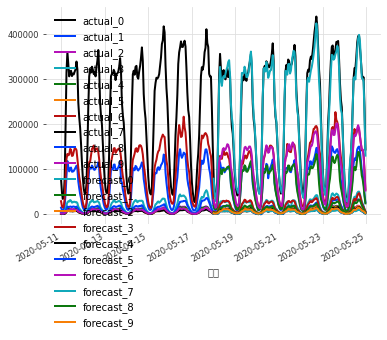

In [45]:
pred_series = model.predict(n=24*7, series=val_df[:24*7])

val_df.plot(label="actual")
pred_series.plot(label="forecast")
plt.legend()

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 100% 1/1 [00:00<?, ?it/s]


[2022-02-23 05:13:23,865] WARNING | darts.timeseries | Number of components is larger than 10 (35). Plotting only the first 10 components.
[2022-02-23 05:13:23,924] WARNING | darts.timeseries | Number of components is larger than 10 (35). Plotting only the first 10 components.


/opt/conda/lib/python3.8/site-packages/IPython/core/pylabtools.py:137: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.8/site-packages/IPython/core/pylabtools.py:137: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


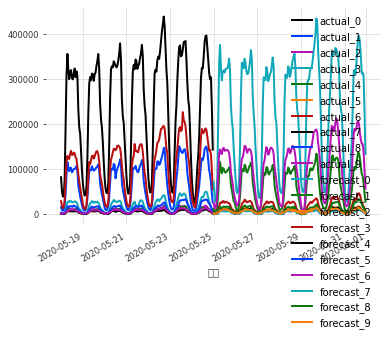

In [48]:
pred_series = model.predict(n=24*7, series=test_df[:24*7])

test_df[:24*7].plot(label="actual")
pred_series.plot(label="forecast")
plt.legend()

In [47]:
pred_df = pred_series.pd_dataframe()
pred_df

component,10,100,101,120,121,140,150,160,200,201,...,1020,1040,1100,1200,1510,2510,3000,4510,5510,6000
날짜,,,,,,,,,,,,,,,,,,,,,
2020-05-18 00:00:00,78758.653981,18177.046479,2250.139947,5549.713288,1705.665051,1943.534369,30950.970605,1282.817836,3903.576131,1947.698060,...,855.341879,2433.718606,5491.073011,3523.429378,572.856416,3040.393916,725.373820,2736.701690,1836.893377,2353.031742
2020-05-18 01:00:00,49925.175840,11669.525558,1899.662709,3648.974507,1925.916947,1405.001609,20666.682401,920.105404,2221.043829,1101.607697,...,844.607993,2790.593603,5715.917662,2622.558733,69.332433,2163.091972,55.111957,1411.800508,1028.911595,2664.988023
2020-05-18 02:00:00,33442.006389,12993.970647,2588.641925,4371.558409,1323.134687,1657.450052,14063.422168,909.634972,2840.978479,1381.221742,...,1555.123720,1706.531515,1213.897645,924.208812,11.035876,2639.053057,637.912571,1929.532786,1805.024075,2374.082087
2020-05-18 03:00:00,28017.524779,11157.661829,1911.943609,3423.600796,1877.026780,1425.532818,15860.245057,802.470993,2546.798175,1362.029600,...,7.887618,1005.261364,-679.129897,-199.191106,468.631111,1423.685234,908.663684,693.068239,770.966391,1809.161271
2020-05-18 04:00:00,65090.454297,15996.485074,1806.951935,3545.472974,1118.338017,897.710584,34147.394137,1034.950245,2840.832890,2066.752990,...,371.557702,3226.861549,3182.791377,2193.053115,1194.016451,1472.164697,415.830704,837.273435,1205.476791,2812.731390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-24 19:00:00,303640.212264,85657.080713,8681.646274,24958.940788,8061.760006,6988.340051,145235.140077,6345.500707,19494.851031,8182.618841,...,6043.691852,13522.099653,29066.362623,13562.603245,8589.861463,21625.636860,2827.860242,13780.888589,9011.434299,17523.857802
2020-05-24 20:00:00,300894.164119,76956.032418,7504.653990,19266.570920,7170.074746,5523.869986,143395.629714,5327.493822,15162.045577,6887.913338,...,4771.563100,13446.323499,30446.840099,14795.535959,7571.282372,18825.628150,2279.881754,11651.345571,8529.767652,14612.432624
2020-05-24 21:00:00,294617.436757,62472.513510,6058.669125,15516.376812,4419.880336,3965.662973,128322.098959,4390.495077,10622.084122,6306.984873,...,3288.206630,10167.914704,26819.479840,13899.577137,6098.938353,16047.158892,1710.089746,9349.647259,6606.284591,12208.248754


In [48]:
submission_file_path = os.path.join(DATASET_PATH, 'sample_submission.csv')
submission_table = pd.read_csv(submission_file_path)
submission_table.iloc[:,1:] = pred_df.reset_index(drop=True)
submission_table.to_csv('nbeats.csv', index=False)